In [1]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#DATA COLLECTION
#IMPORTING THE DATASET
data = pd.read_csv("TC.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# DISPLAY ROWS AND COLUMNS
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#DISPLAY NULL VALUES
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#HANDLING THE MISSING VALUES
data = data.drop(columns='Cabin')

In [9]:
#FILL MISSING VALUES OF AGE COLUMNS WITH MEAN
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [10]:
#FILL MISSING VALUES OF EMBARKED COLUMNS
data["Embarked"].mode()

0    S
dtype: object

In [11]:
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)

In [12]:
#DATA ANALYSIS
data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                             

In [13]:
#DISPLAY THE SURVIVED PASSENGER
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
#DATA VISUALIZATION
sns.set()

<AxesSubplot:xlabel='Sex', ylabel='count'>

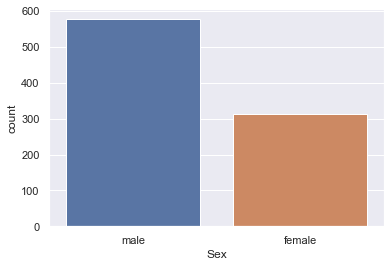

In [15]:
sns.countplot(data=data,x="Sex")

<AxesSubplot:xlabel='Survived', ylabel='count'>

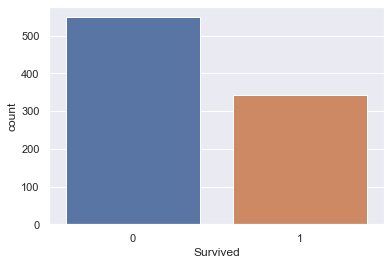

In [16]:
sns.countplot(data=data,x="Survived")

<AxesSubplot:xlabel='Survived', ylabel='count'>

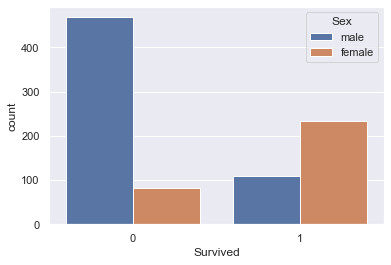

In [17]:
sns.countplot(data=data,x="Survived",hue="Sex")

In [18]:
#ENCODING
#DISPLAY THE PASSENGER AS PER GENDER
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
#THE CATEGORICAL COLUMNS
data.replace({"Sex":{"male":0,"female":1},"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [21]:
#SEPARATING TARGETS AND FEATURES
x = data.drop(["PassengerId","Name","Survived","Ticket"],axis=1)
y = data["Survived"]

In [22]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [23]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [24]:
# SPLIT THE DATA FRO TRAINING AND TESTING
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [25]:
#LOGISTIC REGRESSION
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [26]:
#CHECK THE ACCURACY ON TRAINING
x_train_prediciton = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train,x_train_prediciton)
print("Training Accuracy is:",training_data_accuracy)

Training Accuracy is: 0.7921348314606742


In [27]:
#CHECK THE ACCURACY ON TESTING
x_test_prediciton = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_prediciton)
print("Testing Accuracy is:",test_data_accuracy)

Testing Accuracy is: 0.8156424581005587


In [28]:
#BUILDING A SYSTEM ON GIVING INPUT
input_data = (1,5,65,9.1,4,30,8)
input_as_numpy = np.asarray(input_data)

In [29]:
input_reshape = input_as_numpy.reshape(1,-1)
prediction = model.predict(input_reshape)

In [30]:
print(prediction)
if(prediction[0]==0):
  print("The Person won't be saved from Sinking")
else:
  print("The Person will be saved from Sinking")

[1]
The Person will be saved from Sinking


In [31]:
print(prediction)
if(prediction[0]==1):
  print("The Person won't be saved from Sinking")
else:
  print("The Person will be saved from Sinking")

[1]
The Person won't be saved from Sinking
